## Assignment 3, MACS30000 (Dr. Evans)
#### Submitted by Junho Choi
#### October 21, 2018

### Problem 2-(a)

In [46]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
plt.style.use('seaborn')

In [152]:
# For the sake of consistent results, I set a random seed
# 20181020: the day I started this problem set!
np.random.seed(20181020)

# Generating the log-normal errors; for convenience's sake,
# I will refer to the logged version of errors as "shocks"

# I draw a list of 40 random shocks (one for each year)
# which is done for 10,000 times.
def shock_generator(sim_times, years, SIGMA):

    list_shocks_40 = []
    for i in range(0, sim_times):
        shocks_40 = []
        for j in range(0, years):
            shock = np.random.normal(loc=0.0, scale=SIGMA)
            shocks_40.append(shock)
        mean_40.append(sum(shocks_40)/len(shocks_40))
        list_shocks_40.append(shocks_40)
        
    return list_shocks_40

list_shocks_40 = shock_generator(10000, 40, 0.13)

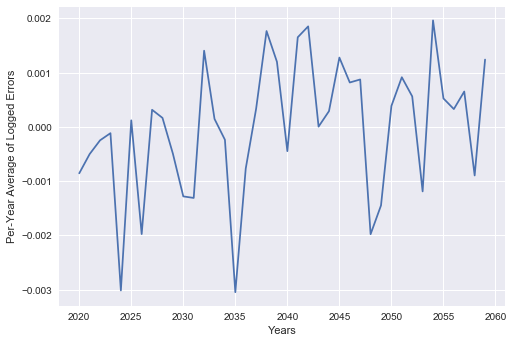

In [153]:
# To ensure that that the errors are not "abnormal,"
# I produce a graph showing trend (for each year)
# of the averages of 10,000 shocks
mean_shock_yearly = []
years = []
initial_year = 2019

for j in range(0, 40):
    sum_shock_single = 0
    initial_year += 1
    for i in range(0, 10000):
        sum_shock_single += list_shocks_40[i][j]
    mean_shock_single = sum_shock_single / 10000
    mean_shock_yearly.append(mean_shock_single)
    years.append(initial_year)
    
plt.plot(years, mean_shock_yearly)
plt.xlabel("Years")
plt.ylabel("Per-Year Average of Logged Errors")
plt.show()

In [128]:
# Making a function for the one-to-next year simulation
def one_year_sim(prev_lny, year, RHO, G, Y_0, shock_list):
    assert year >= 2021 and year <= 2059
    first_term = (1 - RHO) * (math.log(Y_0) + G * (year - 2020))
    second_term = RHO * prev_lny
    shock = shock_list[(year - 2020)]
    next_lny = first_term + second_term + shock
    return next_lny

In [131]:
# Making a function for the entire set of simulations
def entire_sim(RHO, G, Y_0, list_shocks_40):
    simulations_10000 = []
    
    for i, shock_list in enumerate(list_shocks_40):
        list_40_yrs_y = []
        
        lny_2020 = math.log(Y_0) + shock_list[0]
        list_40_yrs_y.append(math.exp(lny_2020))
        
        prev_lny = lny_2020
        year = 2021
        
        for j in range(1, 40):
            next_lny = one_year_sim(
                       prev_lny, year, RHO, G, Y_0, shock_list)
            next_y = math.exp(next_lny)
            list_40_yrs_y.append(next_y) 
        
            prev_lny = next_lny
            year += 1

        simulations_10000.append(list_40_yrs_y)

    return simulations_10000

In [132]:
# Simulating the entire 40 years, Y_0 = 80000; RHO = 0.4; G = 0.025
Y_0 = 80000
RHO = 0.4
G = 0.025

simulations_10000 = entire_sim(0.4, 0.025, 80000, list_shocks_40)

In [133]:
# Randomly pick one of the 10,000 sets of 40 shocks
# Random seed: 30000
np.random.seed(30000)
index = round(np.random.random()*10000)

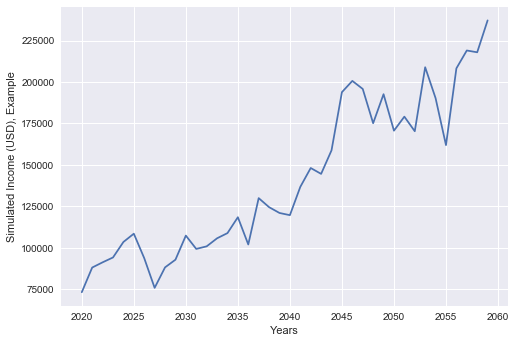

In [134]:
plt.plot(years, simulations_10000[index])
plt.xlabel("Years")
plt.ylabel("Simulated Income (USD), Example")
plt.show()

### Problem 2-(b)

In [89]:
# Making a list of initial incomes (simulated)
initial_incomes = []
log_initial_incomes = []
more_100k = 0
less_70k = 0
for i in simulations_10000:
    if i[0] > 100000:
        more_100k += 1
    elif i[0] < 70000:
        less_70k += 1
    initial_incomes.append(i[0])
    log_initial_incomes.append(math.log(i[0]))

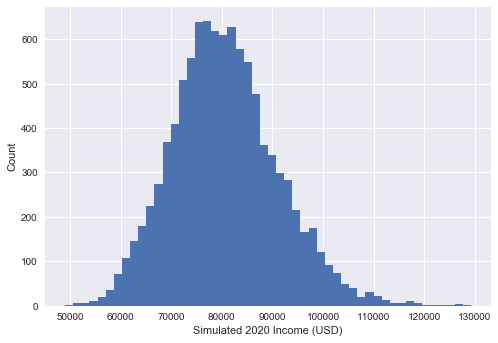

In [116]:
# Histogram for the initial incomes
plt.hist(initial_incomes, bins = 50)
plt.ylabel("Count")
plt.xlabel("Simulated 2020 Income (USD)")
plt.show()

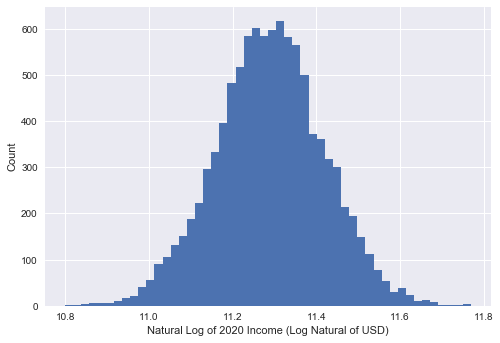

In [117]:
# Histogram for the logged initial incomes
plt.hist(log_initial_incomes, bins = 50)
plt.ylabel("Count")
plt.xlabel("Natural Log of 2020 Income (Log Natural of USD)")
plt.show()

In [93]:
# Percents of those earning more than 100k
# and those earning less than 70k
percent_more_100k = 100 * (more_100k / 10000)
percent_less_70k = 100 * (less_70k / 10000)

print(percent_more_100k,"% ", percent_less_70k, "%")

4.0 %  14.82 %


### Problem 2-(c)

In [141]:
# Making a function to see how many years it will take
# to get rid of all the debts given a certain debt amount
# and a set of simulations
def years_till_debt_free(simulations, DEBT):
    when_debt_free = []
    for i, income in enumerate(simulations):
        DEBT = 95000
        for j in range(len(income)):
            DEBT += (-1) * ((income[j]) / 10)
            if DEBT <= 0:
                when_debt_free.append(j + 1)
                break
    return when_debt_free

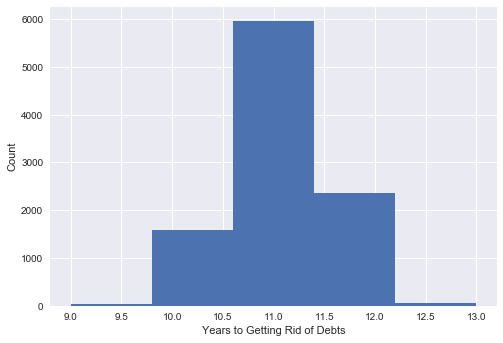

[ 9 10 11 12 13]


In [148]:
# Plugging in the simulations and debt amount to
# the function I've created.
when_debt_free = years_till_debt_free(simulations_10000, 95000)
debt_free_array = np.array(when_debt_free)
unique_debt_free = np.unique(debt_free_array)
unique_numbers = len(unique_debt_free)

# Plotting the histogram
plt.hist(when_debt_free, bins = unique_numbers)
plt.ylabel("Count")
plt.xlabel("Years to Getting Rid of Debts")
plt.show()
print(unique_debt_free)

In [124]:
# What percent take 10 or less years for full debt repayment?
count_less_10 = 0
for i in when_debt_free:
    if i <= 10:
        count_less_10 += 1

what_percent = 100 * (count_less_10 / len(when_debt_free))
print(what_percent)

16.08


### Problem 2-(d)

In [137]:
# Re-simulation
np.random.seed(20181021)
list_shocks_40_2 = shock_generator(10000, 40, 0.17)

simulations_10000_2 = entire_sim(0.4, 0.025, 90000, list_shocks_40_2)

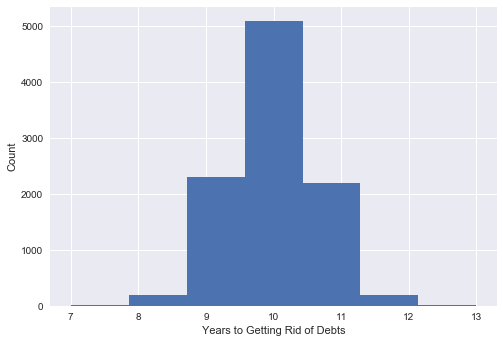

[ 7  8  9 10 11 12 13]


In [150]:
# Plugging in, to the "years_till_debt_free" function,
# the new values of the set of simulations and
# the same amount of debt (i.e. $95,000)
when_debt_free_2 = years_till_debt_free(
                                 simulations_10000_2, 95000)
debt_free_array_2 = np.array(when_debt_free_2)
unique_debt_free_2 = np.unique(debt_free_array)
unique_numbers_2 = len(unique_debt_free)

# Plotting the histogram
plt.hist(when_debt_free_2, bins = unique_numbers_2)
plt.ylabel("Count")
plt.xlabel("Years to Getting Rid of Debts")
plt.show()
print(unique_debt_free)

In [151]:
# What percent take 10 or less years for full debt repayment?
count_less_10 = 0
for i in when_debt_free_2:
    if i <= 10:
        count_less_10 += 1

what_percent = 100 * (count_less_10 / len(when_debt_free_2))
print(what_percent)

76.08
